In [8]:
from pyopenms import *

tsg = TheoreticalSpectrumGenerator()

spec1 = MSSpectrum()
peptide = AASequence.fromString("DFPIANGER")
p = Param()
p.setValue("add_b_ions", "false")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(spec1, peptide, 1, 1) 
print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
    print(ion.decode(), "is generated at m/z", peak.getMZ())


Spectrum 1 of DFPIANGER has 8 peaks.
y1+ is generated at m/z 175.118952913371
y2+ is generated at m/z 304.161547136671
y3+ is generated at m/z 361.18301123237103
y4+ is generated at m/z 475.225939423771
y5+ is generated at m/z 546.263053583271
y6+ is generated at m/z 659.347117934171
y7+ is generated at m/z 756.399882157471
y8+ is generated at m/z 903.468296444571


Text(0, 0.5, 'intensity')

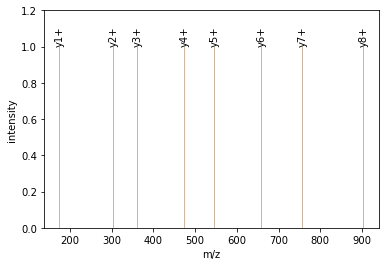

In [10]:
import matplotlib.pyplot as plt
plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) # snap ensures that all bars are rendered
plt.xlabel("m/z")
plt.ylabel("intensity")
mz,i = spec1.get_peaks()
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False) # snap ensures that all bars are rendered
idx = 0
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[idx].decode(), ha='center', va='bottom', rotation=90)
    idx += 1
plt.ylim(top=1.2)
plt.xlabel("m/z")
plt.ylabel("intensity")

In [11]:
spec2 = MSSpectrum()
p.setValue("add_b_ions", "true")
p.setValue("add_a_ions", "true")
p.setValue("add_losses", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(spec2, peptide, 1, 2)

print("Spectrum 2 of", peptide, "has", spec2.size(), "peaks.")
for ion, peak in zip(spec2.getStringDataArrays()[0], spec2):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

exp = MSExperiment()
exp.addSpectrum(spec1)
exp.addSpectrum(spec2)
MzMLFile().store("DFPIANGER.mzML", exp)

Spectrum 2 of DFPIANGER has 146 peaks.
a2-H2O1++ is generated at m/z 51.538743578421
b2-H2O1++ is generated at m/z 65.53620107842099
y1-C1H2N1O1++ is generated at m/z 66.05629515817103
y1-C1H2N2++ is generated at m/z 67.05221565817102
y1-H3N1++ is generated at m/z 79.54984014222102
y1++ is generated at m/z 88.06311469007102
a3-H2O1++ is generated at m/z 100.065125690071
a2-H2O1+ is generated at m/z 102.070210690071
b3-H2O1++ is generated at m/z 114.062583190071
a2++ is generated at m/z 118.05749819007102
b2-H2O1+ is generated at m/z 130.065125690071
y2-C1H2N1O1++ is generated at m/z 130.57759226982103
y1-C1H2N1O1+ is generated at m/z 131.10531384957102
y2-C1H2N2++ is generated at m/z 131.573512769821
b2++ is generated at m/z 132.054955690071
y1-C1H2N2+ is generated at m/z 133.097154849571
y2-H2O1++ is generated at m/z 143.579129269821
y2-H3N1++ is generated at m/z 144.07113725387103
y2++ is generated at m/z 152.58441180172102
a4-H2O1++ is generated at m/z 156.607157865521
y1-H3N1+ is g

Text(0, 0.5, 'intensity')

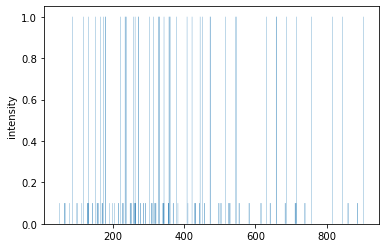

In [12]:
import matplotlib.pyplot as plt
plt.bar(spec2.get_peaks()[0], spec2.get_peaks()[1], snap=False) 
plt.ylabel("intensity")